<a href="https://colab.research.google.com/github/Shauryagulati/Soft-Computing/blob/main/CNN_SC3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

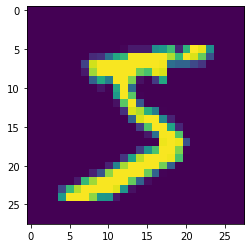

In [ ]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [ ]:
#check image shape
X_train[0].shape

(28, 28)

In [ ]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
from keras.utils import to_categorical
from keras.utils import np_utils

In [ ]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [ ]:
#creating the model model
model = Sequential()

In [ ]:
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 156s 83ms/step - loss: 0.2517 - accuracy: 0.9491 - val_loss: 0.1144 - val_accuracy: 0.9660
Epoch 2/3
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0688 - accuracy: 0.9787 - val_loss: 0.0933 - val_accuracy: 0.9759
Epoch 3/3
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0478 - accuracy: 0.9855 - val_loss: 0.0864 - val_accuracy: 0.9780


[[9.6719269e-08 2.9832680e-15 1.6732091e-06 2.7000829e-07 2.9120870e-12
  3.4284672e-10 2.5900302e-15 9.9999785e-01 5.9240357e-08 3.0720115e-09]
 [1.4689998e-09 1.1825282e-10 1.0000000e+00 3.1818229e-10 1.6604329e-11
  2.5112490e-15 4.2315065e-08 1.1442724e-16 8.8868566e-09 3.5438866e-16]
 [2.5146232e-08 9.9991822e-01 1.5465190e-06 2.3370941e-10 2.8801774e-06
  2.9680677e-07 1.0994694e-08 3.7006498e-07 7.6755852e-05 3.0819685e-08]
 [9.9999940e-01 2.5605873e-11 5.1808741e-10 2.2146872e-13 1.0126652e-12
  2.1030884e-09 6.9314474e-08 3.7012678e-11 4.8058706e-07 5.9424826e-11]
 [7.5415540e-10 1.3537235e-10 5.7952917e-11 3.8385539e-09 9.9999988e-01
  3.6245091e-09 2.2602545e-11 3.7192017e-11 1.6398131e-09 1.0541980e-07]]


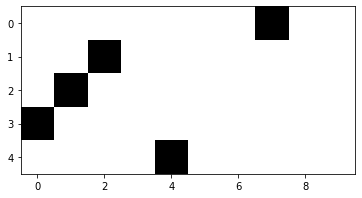

In [ ]:
#predict first 4 images in the test set
five = model.predict(X_test[:5])
print(five)
plt.imshow(five, cmap = plt.cm.binary)
plt.show()

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


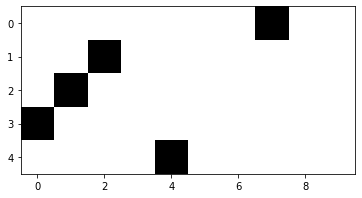

In [ ]:
#actual results for first 4 images in test set
real = y_test[:5]
print(real)
plt.imshow(real, cmap = plt.cm.binary)
plt.show()

In [ ]:
from keras.utils.vis_utils import plot_model

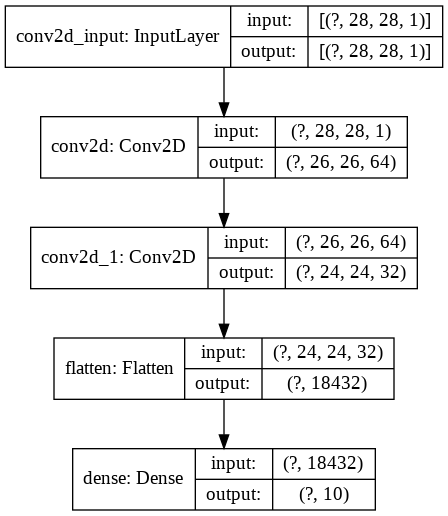

In [ ]:
plot_model(model, to_file='final.png', show_shapes=True, show_layer_names=True)